In [52]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.9.1


In [53]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train Images:")
print(train_images.shape)
print(len(train_labels))
print(train_labels)

print("\nTest Images:")
print(test_images.shape)
print(len(test_labels))


Train Images:
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]

Test Images:
(10000, 28, 28)
10000


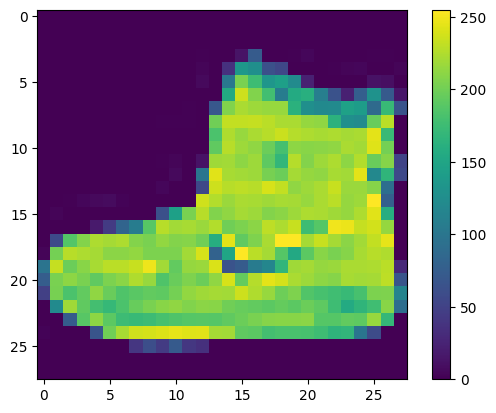

In [55]:
# Show the first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

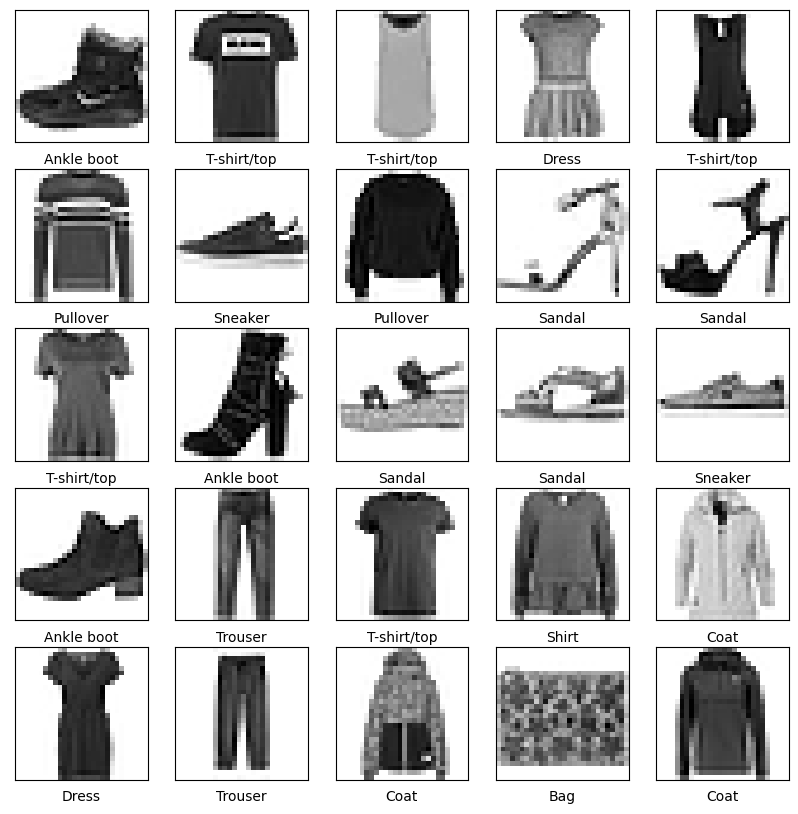

In [56]:
# Process Training Data and Test Data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Show the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [57]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [58]:
# Compile the model
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [59]:
# Train the model
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 928us/step - loss: 0.7344 - accuracy: 0.7616
Epoch 2/20
1875/1875 [==============================] - 2s 919us/step - loss: 0.5092 - accuracy: 0.8274
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4645 - accuracy: 0.8406
Epoch 4/20
1875/1875 [==============================] - 2s 955us/step - loss: 0.4392 - accuracy: 0.8463
Epoch 5/20
1875/1875 [==============================] - 2s 910us/step - loss: 0.4212 - accuracy: 0.8537
Epoch 6/20
1875/1875 [==============================] - 2s 939us/step - loss: 0.4067 - accuracy: 0.8590
Epoch 7/20
1875/1875 [==============================] - 2s 908us/step - loss: 0.3951 - accuracy: 0.8622
Epoch 8/20
1875/1875 [==============================] - 2s 908us/step - loss: 0.3847 - accuracy: 0.8659
Epoch 9/20
1875/1875 [==============================] - 2s 902us/step - loss: 0.3760 - accuracy: 0.8687
Epoch 10/20
1875/1875 [==============================] - 2s 900us/

In [60]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


313/313 - 0s - loss: 0.3697 - accuracy: 0.8693 - 322ms/epoch - 1ms/step

Test accuracy: 0.8693000078201294

Test loss: 0.3697229027748108


In [61]:
# Make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
# Predict the first image
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0]) == test_labels[0]


313/313 [==============================] - 0s 766us/step


True

In [1]:
# Plot the first X test images, their predicted label, and the true
# label
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


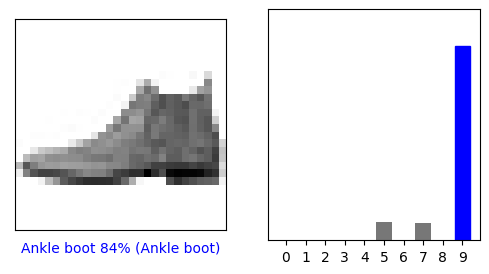

In [63]:
# Show the first image, prediction, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


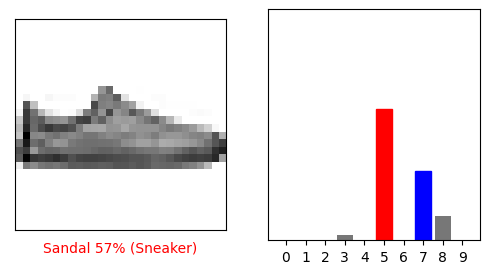

In [64]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


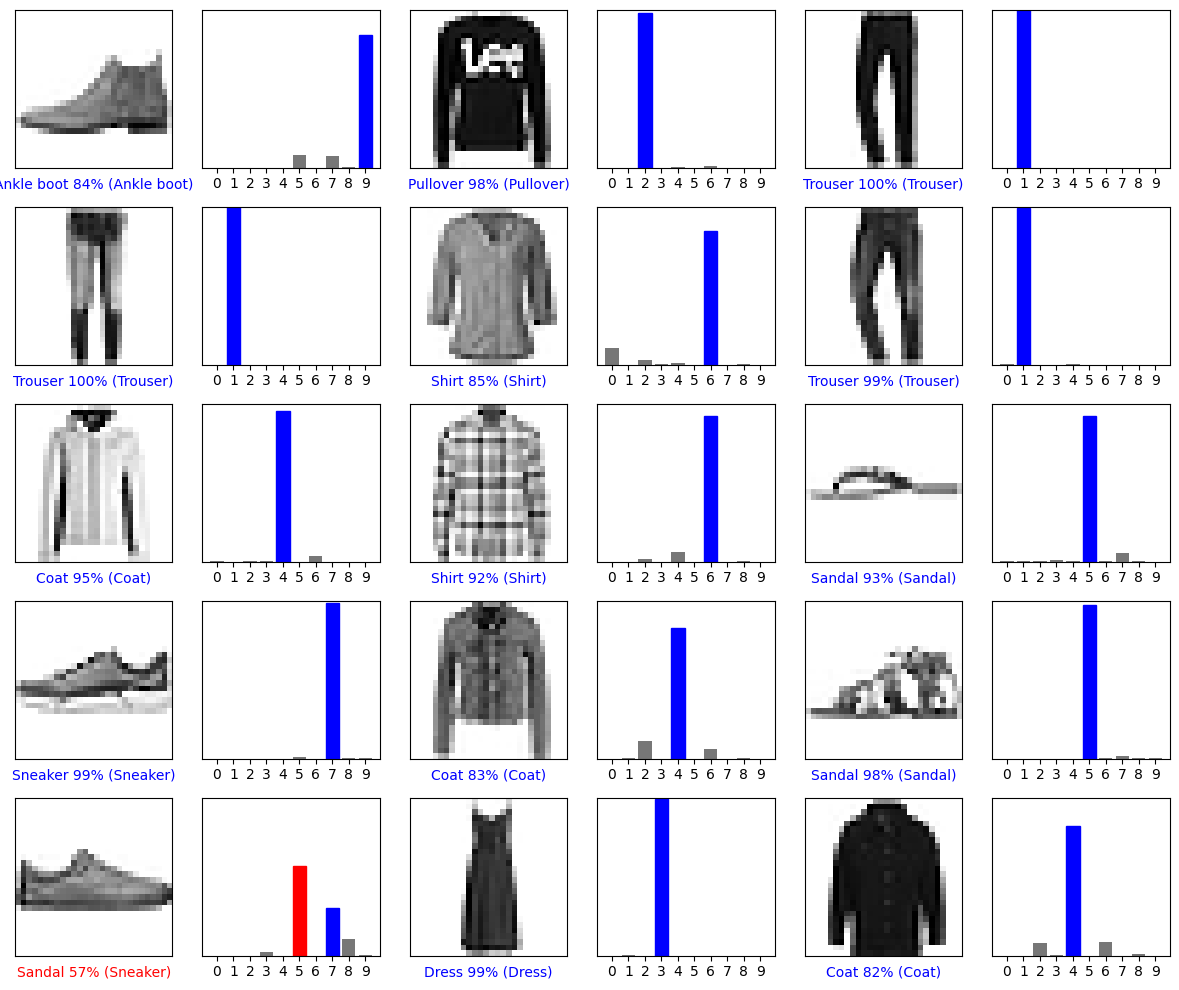

In [65]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [66]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [67]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [68]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 12ms/step
[[3.9671207e-04 5.1636079e-08 9.8288280e-01 5.3872935e-07 5.9809722e-03
  6.9203931e-12 1.0730939e-02 9.0393228e-14 7.9258243e-06 1.8196250e-12]]


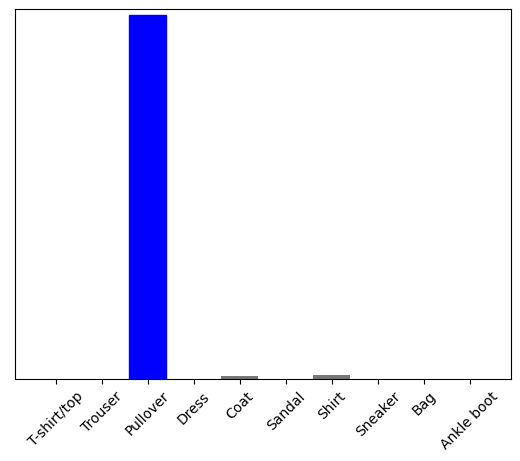

In [69]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [70]:
np.argmax(predictions_single[0])

2